In [42]:
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import hypertools as hyp
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as offline

%matplotlib inline

init_notebook_mode(connected=True)

In [43]:
#load in the data

fname1 = 'Uber-Jan-Feb-FOIL.csv'
columns1 = ('dispatching_base_number', 'date', 'active_vehicles', 'trips')
FOIL_df = pd.read_csv(fname1, skiprows=[0], names=columns1)


In [44]:
fname2 = 'Aggregate FHV Data.xlsx'


sheet1 = 'Trips Per Day'
sheet2 = 'Trips Per Hour and Weekday'
sheet3 = 'Change in Trips Sep 2013-2014'
sheet4 = 'Change in Daily Trips by Hour'

FHV_col1 = ('Date', 'American', 'Carmel', 'Dial 7', 'Diplo', 'Firstclass', 'Highclass', 
            'Prestige', 'Skyline', 'Lyft', 'Uber', 'Yellow Taxis', 'Green Taxis')
FHV_col3 = ('Location', 'Uber and Lyft Trips Per Day 2014', 
            'Yellow Taxi Trips Per Day 2014', 'Yellow Taxi Trips Per Day 2013')
FHV_col4 = ('Hour', 'Uber and Lyft Trips in MN Core (Sep 2014)', 
           'Change in Daily Yellow Trips in MN Core (Sep 2014 compared with Sep 2013')

## data key: MN, JFK, LGA
FHV_df1 = pd.read_excel(fname2, sheetname = sheet1, skiprows=[0], names = FHV_col1)
FHV_df3 = pd.read_excel(fname2, sheetname = sheet3, skiprows=[0], names = FHV_col3)
FHV_df4 = pd.read_excel(fname2, sheetname = sheet4, skiprows=[0], names = FHV_col4)

In [45]:
FHV_df1.set_index('Date', inplace=True)

In [46]:
FHV_df1.head()

,American,Carmel,Dial 7,Diplo,Firstclass,Highclass,Prestige,Skyline,Lyft,Uber,Yellow Taxis,Green Taxis
Date,,,,,,,,,,,,
2014-07-02,1028,2965,2409,1275,2228,1661,3533,1691,0,26480,434416,42472
2014-07-03,1068,3361,2520,1200,2121,1599,3649,1157,0,21597,412980,46046
2014-07-04,1008,2174,1955,1171,1459,1622,3401,337,0,14148,306773,41535
2014-07-05,1214,1846,1371,1371,1703,1898,4081,276,0,10890,305653,46873
2014-07-06,1048,2480,1872,1251,1501,1738,3545,401,0,11443,310376,40354


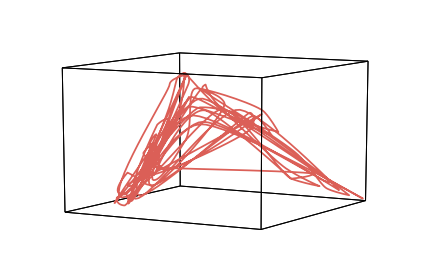

(<matplotlib.figure.Figure at 0x7f25545cfc88>,
 [array([[  1028,   2965,   2409, ...,  26480, 434416,  42472],
         [  1068,   3361,   2520, ...,  21597, 412980,  46046],
         [  1008,   2174,   1955, ...,  14148, 306773,  41535],
         ..., 
         [  1080,   2559,   1949, ...,  29656, 429068,  51832],
         [   772,   3225,   2349, ...,  29201, 396191,  37657],
         [   848,   2824,   2004, ...,  33431, 431354,  38665]])],
 None)

In [47]:
hyp.plot(FHV_df1, model='SpectralEmbedding')

In [48]:
fname3 = 'uber-trip-data/uber-raw-data-apr14.csv'
columns3 = ('Time', 'Lat', 'Lon', 'Base')
april_df = pd.read_csv(fname3, skiprows=[0], names=columns3)

In [49]:
april_df

,Time,Lat,Lon,Base
0,4/1/14 0:11,40.7690,-73.9549,B02512
1,4/1/14 0:17,40.7267,-74.0345,B02512
2,4/1/14 0:21,40.7316,-73.9873,B02512
3,4/1/14 0:28,40.7588,-73.9776,B02512
4,4/1/14 0:33,40.7594,-73.9722,B02512
5,4/1/14 0:33,40.7383,-74.0403,B02512
6,4/1/14 0:39,40.7223,-73.9887,B02512
7,4/1/14 0:45,40.7620,-73.9790,B02512
8,4/1/14 0:55,40.7524,-73.9960,B02512
9,4/1/14 1:01,40.7575,-73.9846,B02512


In [50]:
april_df.head()

,Time,Lat,Lon,Base
0,4/1/14 0:11,40.7690,-73.9549,B02512
1,4/1/14 0:17,40.7267,-74.0345,B02512
2,4/1/14 0:21,40.7316,-73.9873,B02512
3,4/1/14 0:28,40.7588,-73.9776,B02512
4,4/1/14 0:33,40.7594,-73.9722,B02512


In [51]:
## Individual driver paths
## Abstract to functions
## For loop layers: base driver, date/time split by hour, then trip drawing

# Write a loop for a list of the drivers ("bases")

drivers = {}
for base in april_df['Base']:
    if base in drivers:
        pass
    else:
        drivers[base] = base
        
print(drivers)

{'B02512': 'B02512', 'B02598': 'B02598', 'B02617': 'B02617', 'B02682': 'B02682', 'B02764': 'B02764'}


In [52]:
drivers = {}
for base in april_df['Base']:
    if base in drivers:
        drivers[base].append([april_df['Lat'], april_df['Lon']])

    else:
        drivers[base] = list()
        drivers[base].append([april_df['Lat'], april_df['Lon']])

In [53]:
trip_paths = []
for i in range(1000):
    trip_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [april_df['Lon'][i], april_df['Lon'][i+1]],
            lat = [ april_df['Lat'][i], april_df['Lat'][i+1]],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'rgb(117, 174, 255)'
            )
        )
    )
    
layout = dict(title = 'Uber Trips',
              showlegend = False, 
              geo = dict(
                  scope='north america',
                  projection=dict( type='azimuthal equal area' ),
                  showland = True,
                  landcolor = 'rgb(243, 243, 243)',
                  countrycolor = 'rgb(204, 204, 204)'))
    
fig = dict(data= trip_paths, layout=layout)
iplot(fig, filename='april_trips' )


In [54]:
months = ['apr', 'may', 'jun', 'jul', 'aug', 'sep']
data = []
for m in months:
    next_fname = 'uber-trip-data/uber-raw-data-' + m + '14.csv'
    df = pd.read_csv(next_fname, names=['Time', 'Lat', 'Long', 'Base'], header=0)
    try:
        data.append(df.set_index('Time'))
        print('Loaded ' + next_fname)
    except:
        print('Stuck on: ' + next_fname)
        break
        
print(data[0])

Loaded uber-trip-data/uber-raw-data-apr14.csv
Loaded uber-trip-data/uber-raw-data-may14.csv
Loaded uber-trip-data/uber-raw-data-jun14.csv
Loaded uber-trip-data/uber-raw-data-jul14.csv
Loaded uber-trip-data/uber-raw-data-aug14.csv
Loaded uber-trip-data/uber-raw-data-sep14.csv
                   Lat     Long    Base
Time                                   
4/1/14 0:11    40.7690 -73.9549  B02512
4/1/14 0:17    40.7267 -74.0345  B02512
4/1/14 0:21    40.7316 -73.9873  B02512
4/1/14 0:28    40.7588 -73.9776  B02512
4/1/14 0:33    40.7594 -73.9722  B02512
4/1/14 0:33    40.7383 -74.0403  B02512
4/1/14 0:39    40.7223 -73.9887  B02512
4/1/14 0:45    40.7620 -73.9790  B02512
4/1/14 0:55    40.7524 -73.9960  B02512
4/1/14 1:01    40.7575 -73.9846  B02512
4/1/14 1:19    40.7256 -73.9869  B02512
4/1/14 1:48    40.7591 -73.9684  B02512
4/1/14 1:49    40.7271 -73.9803  B02512
4/1/14 2:11    40.6463 -73.7896  B02512
4/1/14 2:25    40.7564 -73.9167  B02512
4/1/14 2:31    40.7666 -73.9531  B02512
4/1/

In [55]:
from datetime import datetime, timedelta

timeblocks = {}


for i in range(0,len(april_df)):
    time = april_df.Time[i].strip().split()
    hour = time[1].strip().split(':')
    if hour[0] not in timeblocks:
        timeblocks[hour[0]] = {'x': [], 'y': []}
    else:
        timeblocks[hour[0]]['x'].append(april_df.Lat[i]) 
        timeblocks[hour[0]]['y'].append(april_df.Lon[i])


In [62]:
layout = dict(title='Uber rides by hour',              
             geo = dict(
                scope='new york',
                projection=dict(type='Mercato'),
                opacity = 0.3,
                showland = True,
                landcolor = "rgb(229, 229, 229)",
                countrycolor = "rgb(255, 255, 255)" ,
                coastlinecolor = "rgb(255, 255, 255)",
                
                lonaxis = dict( range= [ -75.0, -73.0 ] ),
                lataxis = dict( range= [ 40.0, 42.0 ] ),
                domain = dict(
                    x = [ 0, 1 ],
                    y = [ 0, 1 ]
                )
            ))

for i in range(0,24):
    locations = timeblocks[str(i)]
    fig = dict(data=[go.Scattergeo(lat=locations['x'], lon=locations['y'])], layout=layout)
    # iplot(fig)
    offline.plot(fig, auto_open=True, image = 'png', image_filename='img-png/plot_image'+str(i), 
                 output_type='file', image_width=800, image_height=600, filename='img-html/temp-plot'+str(i)+'.html', validate=False)

In [ ]:
seasons = {}

for i in range(0,len(april_df)):
    hour = april_df.Time[i].strip().split()
    hour = time[1].strip().split(':')
    if hour[0] not in timeblocks:
        timeblocks[hour[0]] = {'x': [], 'y': []}
    else:
        timeblocks[hour[0]]['x'].append(april_df.Lat[i]) 
        timeblocks[hour[0]]['y'].append(april_df.Lon[i])

In [ ]:
layout = dict(title='Uber rides by seasons',              
             geo = dict(
                scope='new york',
                projection=dict(type='Mercato'),
                opacity = 0.3,
                showland = True,
                landcolor = "rgb(229, 229, 229)",
                countrycolor = "rgb(255, 255, 255)" ,
                coastlinecolor = "rgb(255, 255, 255)",
                
                lonaxis = dict( range= [ -75.0, -73.0 ] ),
                lataxis = dict( range= [ 40.0, 42.0 ] ),
                domain = dict(
                    x = [ 0, 1 ],
                    y = [ 0, 1 ]
                )
            ))

for i in seasons:
    locations = timeblocks[str(i)]
    fig = dict(data=[go.Scattergeo(lat=locations['x'], lon=locations['y'])], layout=layout)
    # iplot(fig)
    offline.plot(fig, auto_open=True, image = 'png', image_filename='img-png/plot_image'+str(i), 
                 output_type='file', image_width=800, image_height=600, filename='img-html/temp-plot'+i+'.html', validate=False)

In [ ]:
def get_im(fname):
        mpl.pyplot.axis('off')
        return mpl.pyplot.imshow(mpl.pyplot.imread(fname), animated=True)

fig = mpl.pyplot.figure()
ani = mpl.animation.FuncAnimation(fig, get_im, 'img-png', interval=50)
HTML(ani.to_html5_video())